In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Outliers 
    
        We need to detect then to remove these outliers 

In [4]:
arr1 = np.random.randint(1, 50, 40)
arr2 = np.random.randint(250, 300, 10)
arr = np.concatenate((arr1, arr2))
np.random.shuffle(arr)

In [9]:
df = pd.DataFrame(arr.reshape(10, 5), columns=list("ABCDE"))

In [10]:
df

,A,B,C,D,E
0,31,48,23,11,10
1,19,36,255,47,292
2,293,29,24,44,12
3,22,16,13,6,32
4,24,262,31,13,36
5,23,40,1,265,272
6,46,18,17,286,14
7,252,4,254,3,37
8,39,6,4,24,285
9,7,33,34,13,35


#### Detection 

    1. Visualization
    2. Z-index
    3. IQR

#### Visualization

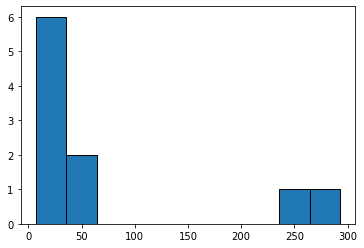

In [12]:
plt.hist(df['A'], ec='k')
plt.show()

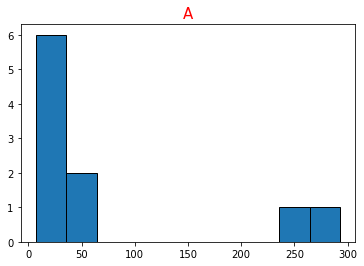

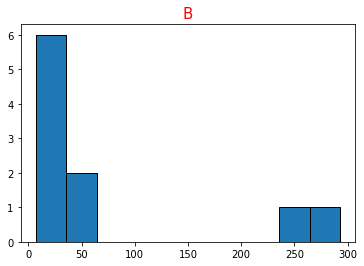

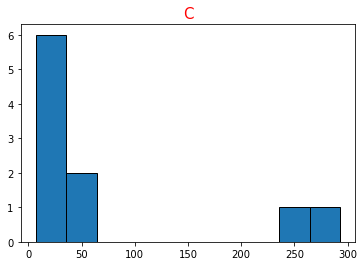

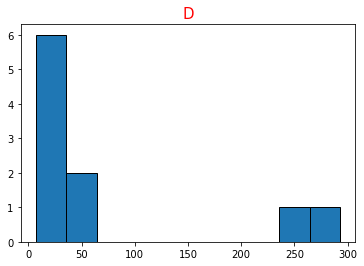

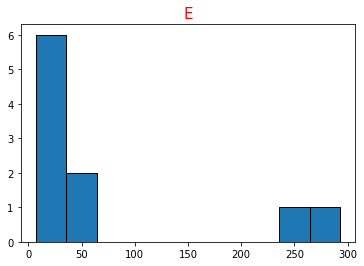

In [14]:
for i in df:
    plt.hist(df['A'], ec='k')
    plt.title(i, fontsize=15, color="red")
    plt.show()

In [16]:
df>240

,A,B,C,D,E
0,False,False,False,False,False
1,False,False,True,False,True
2,True,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,True,True
6,False,False,False,True,False
7,True,False,True,False,False
8,False,False,False,False,True
9,False,False,False,False,False


In [17]:
df.mean()

A     75.6
B     49.2
C     65.6
D     71.2
E    102.5
dtype: float64

In [20]:
df[df>240] = np.nan

In [21]:
df

,A,B,C,D,E
0,31.0,48.0,23.0,11.0,10.0
1,19.0,36.0,NaN,47.0,NaN
2,NaN,29.0,24.0,44.0,12.0
3,22.0,16.0,13.0,6.0,32.0
4,24.0,NaN,31.0,13.0,36.0
5,23.0,40.0,1.0,NaN,NaN
6,46.0,18.0,17.0,NaN,14.0
7,NaN,4.0,NaN,3.0,37.0
8,39.0,6.0,4.0,24.0,NaN
9,7.0,33.0,34.0,13.0,35.0


In [23]:
df.fillna(df.mean(), inplace=True)

In [24]:
df

,A,B,C,D,E
0,31.000,48.000000,23.000,11.000,10.000000
1,19.000,36.000000,18.375,47.000,25.142857
2,26.375,29.000000,24.000,44.000,12.000000
3,22.000,16.000000,13.000,6.000,32.000000
4,24.000,25.555556,31.000,13.000,36.000000
5,23.000,40.000000,1.000,20.125,25.142857
6,46.000,18.000000,17.000,20.125,14.000000
7,26.375,4.000000,18.375,3.000,37.000000
8,39.000,6.000000,4.000,24.000,25.142857
9,7.000,33.000000,34.000,13.000,35.000000


In [25]:
df.mean()

A    26.375000
B    25.555556
C    18.375000
D    20.125000
E    25.142857
dtype: float64

In [36]:
arr1 = np.random.randint(1, 50, 40)
arr2 = np.random.randint(250, 300, 10)
arr = np.concatenate((arr1, arr2))
np.random.shuffle(arr)
df = pd.DataFrame(arr.reshape(10, 5), columns=list("ABCDE"))

### Z-Index 


$$ \text{z-index} = \frac {x - u} {\sigma} $$

In [38]:
df[(df['A'] - df['A'].mean())/df['A'].std() > 1]

,A,B,C,D,E
1,282,40,45,36,37
3,252,9,47,24,36
6,280,41,2,3,284
7,267,44,281,4,24


#### InterQuatile Range

    q1 = quartile 1
    q3 = quartile 3
    iqr = q3 - q1
    
    
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iq2*1.5)
    
    The values which are not in between your lower_bound and upper_bound are outliers

### Pandas Visualization

In [39]:
tip = sns.load_dataset("tips")

In [40]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

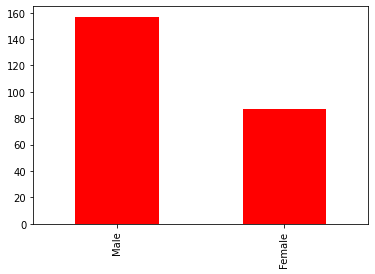

In [44]:
tip['sex'].value_counts().plot(kind="bar", color="red")

<AxesSubplot:>

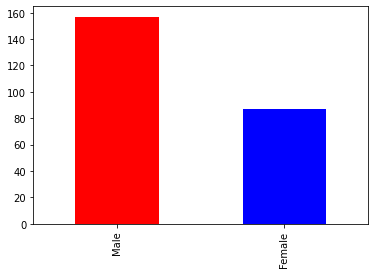

In [47]:
tip['sex'].value_counts().plot(kind="bar", color=['red', 'blue'])

<AxesSubplot:>

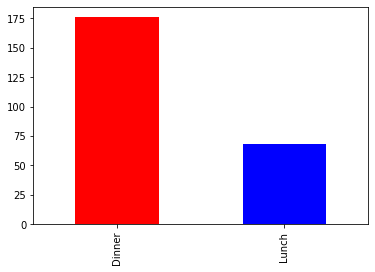

In [48]:
tip['time'].value_counts().plot(kind="bar", color=['red', 'blue'])

In [49]:
tip['time'].plot()  # plot --> line plot

TypeError: no numeric data to plot

<AxesSubplot:>

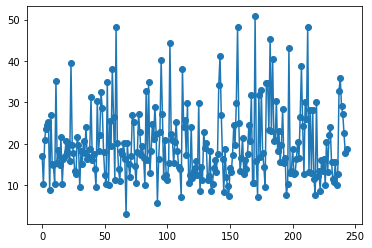

In [51]:
tip['total_bill'].plot(marker='o')

<AxesSubplot:>

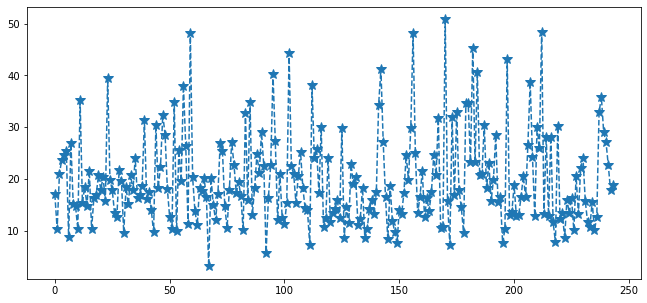

In [58]:
plt.figure(figsize=(11, 5))
tip['total_bill'].plot(marker='*', ms=10, ls='--')

<AxesSubplot:>

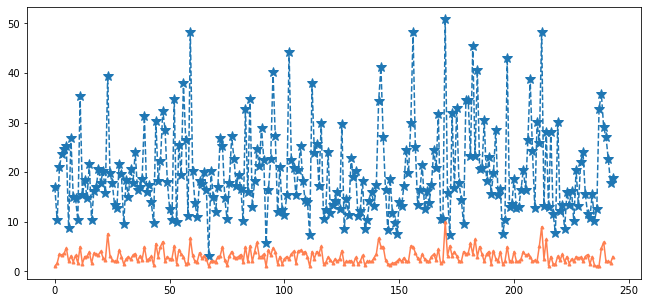

In [64]:
plt.figure(figsize=(11, 5))
tip['total_bill'].plot(marker='*', ms=10, ls='--')
tip['tip'].plot(color='coral', marker='^', ms=3)

<AxesSubplot:xlabel='sex,day'>

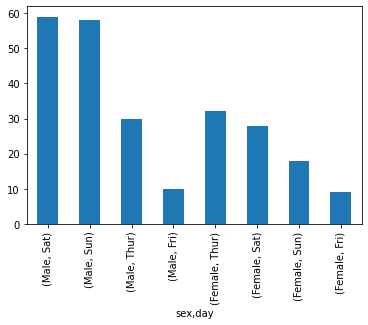

In [66]:
tip.groupby("sex")['day'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

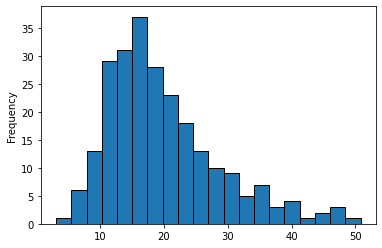

In [69]:
tip['total_bill'].plot(kind='hist', bins=20, ec='k')

<AxesSubplot:ylabel='time'>

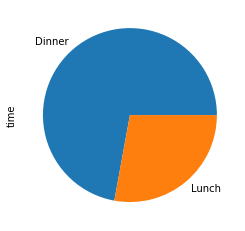

In [70]:
tip['time'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='day'>

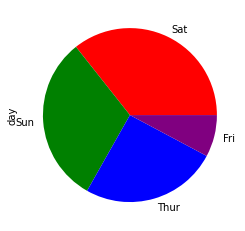

In [73]:
tip['day'].value_counts().plot(kind='pie', colors=['red', 'green', 'blue', 'purple'])

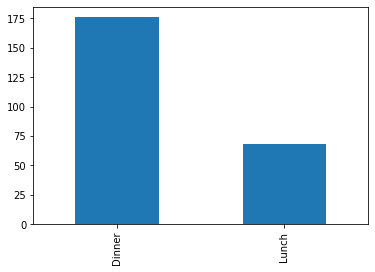

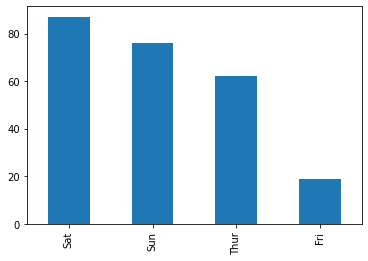

In [75]:
tip['time'].value_counts().plot(kind="bar")
plt.show()
tip['day'].value_counts().plot(kind="bar")
plt.show()